In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np

In [3]:
tf.__version__

'2.3.0'

In [4]:
keras.__version__

'2.4.0'

In [26]:
fashion_mnist = keras.datasets.fashion_mnist

In [27]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [28]:
X_train_full.shape

(60000, 28, 28)

In [29]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [30]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [31]:
y_valid.dtype

dtype('uint8')

In [32]:
y_valid.shape

(5000,)

In [33]:
X_valid.shape

(5000, 28, 28)

In [34]:
X_train.shape

(55000, 28, 28)

In [35]:
y_train[0]

4

In [36]:
class_names =["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

#### Rough

In [37]:
X_valid[0].reshape(-2,4)

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        ,

#### Fair Again

In [38]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation ='relu'))
model.add(keras.layers.Dense(100, activation ='relu'))
model.add(keras.layers.Dense(10, activation ='softmax'))

or we could have also done

In [39]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28,28]),
keras.layers.Dense(300, activation ='relu'),
keras.layers.Dense(100, activation ='relu'),
keras.layers.Dense(10, activation ='softmax')
])

In [40]:
model.layers

In [41]:
hidden1= model.layers[1]

In [42]:
hidden1.name

'dense_9'

In [43]:
model.get_layer('dense_3') is hidden1

ValueError: No such layer: dense_3.

In [44]:
weights, biases =hidden1.get_weights()

In [45]:
weights

array([[-0.04426192,  0.05032662, -0.07023826, ..., -0.07422584,
        -0.00282112,  0.04623634],
       [-0.03956567, -0.03818621, -0.05222069, ..., -0.06196735,
        -0.02681772, -0.04667954],
       [-0.00676085, -0.03378117, -0.05461742, ..., -0.04184872,
        -0.03424534, -0.03198791],
       ...,
       [-0.06003925,  0.01155671, -0.03590874, ...,  0.04885984,
        -0.04579786, -0.0132227 ],
       [-0.03344664, -0.03795624,  0.02208528, ..., -0.05845421,
        -0.06647172,  0.01665368],
       [ 0.03351586,  0.05539751,  0.07429868, ..., -0.00964574,
         0.07007134,  0.00059431]], dtype=float32)

In [46]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [47]:
biases.shape

(300,)

In [48]:
model.compile(loss ='sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics=['accuracy'])

In [49]:
y_valid

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

In [54]:
history = model.fit(X_train, y_train, epochs = 30, validation_data =(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3052 - accuracy: 0.8873 - val_loss: 0.3121 - val_accuracy: 0.8848
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2736 - accuracy: 0.8984 - val_loss: 0.2989 - val_accuracy: 0.8932
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2595 - accuracy: 0.9039 - val_loss: 0.2940 - val_accuracy: 0.8914
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2506 - accuracy: 0.9065 - val_loss: 0.2953 - val_accuracy: 0.8920
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2435 - accuracy: 0.9099 - val_loss: 0.2906 - val_accuracy: 0.8948
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2373 - accuracy: 0.9120 - val_loss: 0.2882 - val_accuracy: 0.8960
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2321 - accuracy: 0.9137 - val_loss: 0.2865 - val_accuracy:

In [58]:
55000/32

1718.75

5

The number 1719 shown during fitting the model is not the training samples; it is the number of batches.

model.fit includes an optional argument batch_size, which, according to the documentation:

If unspecified, batch_size will default to 32.

So, what happens here is - you fit with the default batch size of 32 (since you have not specified anything different), so the total number of batches for your data is

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

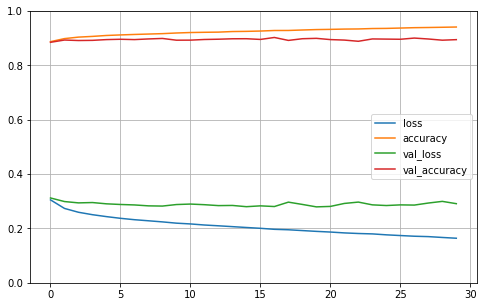

In [58]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)#set the vertical range to [0-1]
plt.show()

In [59]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 74.3659 - accuracy: 0.8344


[74.36591339111328, 0.8343999981880188]

In [60]:
X_new =X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [61]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [62]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')